# Importação e Configuração Inicial

In [ ]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Leitura do dataset
df = pd.read_csv("habitos_e_desempenho_estudantil.csv")

# Visualizar as primeiras linhas
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Exploração Inicial dos Dados

In [7]:
# Exibir as dimensões do dataset (linhas x colunas)
print("Dimensões do dataset:", df.shape)

# Verificar informações gerais (tipos, valores nulos, memória)
df.info()

Dimensões do dataset: (1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality

In [4]:
# Estatísticas descritivas apenas para variáveis numéricas
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
# Contagem de valores ausentes por coluna
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Separar colunas numéricas e categóricas
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_categoricas = df.select_dtypes(exclude=np.number).columns.tolist()

print("\nColunas numéricas:", colunas_numericas)
print("Colunas categóricas:", colunas_categoricas)


Valores ausentes por coluna:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Colunas numéricas: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Colunas categóricas: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


In [8]:
# Diagnóstico simples de qualidade dos dados
print(f"\nTotal de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")
print(f"Duplicadas: {df.duplicated().sum()} linhas")
print(f"Percentual de valores ausentes: {round((df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100, 2)}%")



Total de linhas: 1000
Total de colunas: 16
Duplicadas: 0 linhas
Percentual de valores ausentes: 0.57%


In [11]:
# Filtrar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=np.number).columns

# Criar um dicionário com a contagem de valores negativos por coluna
valores_negativos = {col: (df[col] < 0).sum() for col in colunas_numericas}

# Exibir apenas as colunas que possuem valores negativos
valores_negativos = {k: v for k, v in valores_negativos.items() if v > 0}

if valores_negativos:
    print("Colunas com valores negativos encontrados:\n")
    for coluna, qtd in valores_negativos.items():
        print(f" - {coluna}: {qtd} valores negativos")
else:
    print("Não tem valores negativos.")


Não tem valores negativos.


In [12]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=np.number).columns

# Dicionário para armazenar a contagem de outliers por coluna
outliers = {}

for col in colunas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    qtd_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    outliers[col] = qtd_outliers

# Exibir colunas com outliers
print("Contagem de outliers por coluna:")
for col, qtd in outliers.items():
    print(f" - {col}: {qtd}")

# Total geral
total_outliers = sum(outliers.values())
print(f"\nTotal geral de outliers encontrados: {total_outliers}")


📊 Contagem de outliers por coluna:
 - age: 0
 - study_hours_per_day: 7
 - social_media_hours: 5
 - netflix_hours: 4
 - attendance_percentage: 3
 - sleep_hours: 2
 - exercise_frequency: 0
 - mental_health_rating: 0
 - exam_score: 2

Total geral de outliers encontrados: 23


In [16]:
# DataFrame para armazenar as ocorrências de outliers
detalhes_outliers = []

# Aplicar o método IQR para cada coluna numérica
for col in colunas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar linhas que estão fora do intervalo
    outliers_coluna = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    # Para cada linha, salvar o índice, coluna e valor
    for idx, valor in zip(outliers_coluna.index, outliers_coluna[col]):
        detalhes_outliers.append({
            'linha': idx,
            'coluna': col,
            'valor_outlier': valor,
            'limite_inferior': round(limite_inferior, 2),
            'limite_superior': round(limite_superior, 2)
        })

# Converter para DataFrame
df_detalhes_outliers = pd.DataFrame(detalhes_outliers)

# Exibir tabela detalhada
print(f"Total de ocorrências de outliers identificadas: {len(df_detalhes_outliers)}\n")
df_detalhes_outliers.head(20)


Total de ocorrências de outliers identificadas: 23



,linha,coluna,valor_outlier,limite_inferior,limite_superior
0,73,study_hours_per_day,7.4,-0.25,7.35
1,293,study_hours_per_day,7.4,-0.25,7.35
2,455,study_hours_per_day,8.3,-0.25,7.35
3,489,study_hours_per_day,7.4,-0.25,7.35
4,774,study_hours_per_day,7.5,-0.25,7.35
5,797,study_hours_per_day,8.2,-0.25,7.35
6,875,study_hours_per_day,7.6,-0.25,7.35
7,145,social_media_hours,6.2,-0.70,5.70
8,346,social_media_hours,6.0,-0.70,5.70
9,361,social_media_hours,6.1,-0.70,5.70


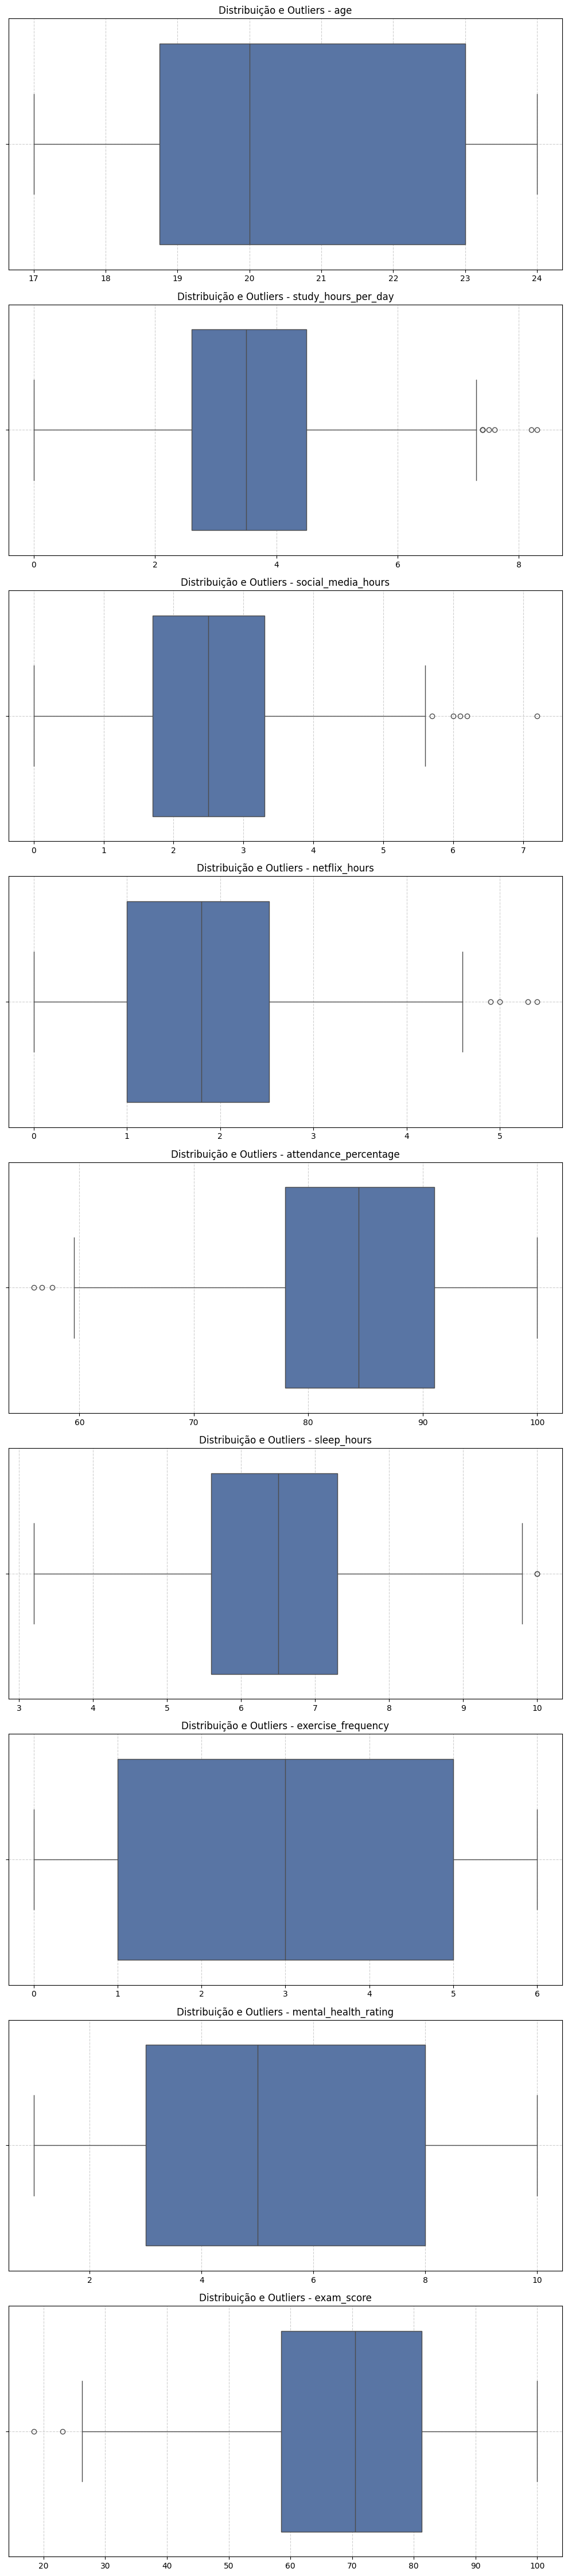

In [20]:
# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=np.number).columns

# Definir tamanho da figura
num_cols = len(colunas_numericas)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Criar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i] if num_cols > 1 else axes
    sns.boxplot(x=df[col], ax=ax, color="#4C72B0")
    ax.set_title(f"Distribuição e Outliers - {col}", fontsize=12)
    ax.set_xlabel("")
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Engenharia de Dados

In [21]:
# Preencher nulos da coluna parental_education_level com 'Desconhecido'
df["parental_education_level"].fillna("Desconhecido", inplace=True)

# Confirmar
print(df["parental_education_level"].isnull().sum())


0


C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\776260861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["parental_education_level"].fillna("Desconhecido", inplace=True)


In [22]:
# ==========================
# Verificação de inconsistências nas escalas e faixas
# ==========================

# Lista de colunas numéricas para verificar
colunas_numericas = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "attendance_percentage",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

# Exibir valores mínimos e máximos de cada uma
print("📊 Faixa de valores por coluna numérica:\n")
for col in colunas_numericas:
    minimo = df[col].min()
    maximo = df[col].max()
    print(f"{col:25} -> Mínimo: {minimo} | Máximo: {maximo}")


📊 Faixa de valores por coluna numérica:

study_hours_per_day       -> Mínimo: 0.0 | Máximo: 8.3
social_media_hours        -> Mínimo: 0.0 | Máximo: 7.2
netflix_hours             -> Mínimo: 0.0 | Máximo: 5.4
sleep_hours               -> Mínimo: 3.2 | Máximo: 10.0
attendance_percentage     -> Mínimo: 56.0 | Máximo: 100.0
exercise_frequency        -> Mínimo: 0 | Máximo: 6
mental_health_rating      -> Mínimo: 1 | Máximo: 10
exam_score                -> Mínimo: 18.4 | Máximo: 100.0


faixa de uso das redes sociais

In [27]:
df["social_media_usage_category"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 2, 4, 6, 8, 24],
    labels=["Muito Baixo", "Baixo", "Moderado", "Alto", "Excessivo"],
    include_lowest=True
)

faixa horas de estudo

In [28]:
df["study_hours_category"] = pd.cut(
    df["study_hours_per_day"],
    bins=[0, 2, 4, 6, 8, 12],
    labels=["Muito Baixo", "Baixo", "Moderado", "Alto", "Intenso"],
    include_lowest=True
)

classificação saude mental

In [29]:
df["mental_health_category"] = pd.cut(
    df["mental_health_rating"],
    bins=[0, 3, 6, 8, 10],
    labels=["Baixa", "Moderada", "Boa", "Excelente"],
    include_lowest=True
)

In [30]:
df[["study_hours_per_day", "study_hours_category", 
    "social_media_hours", "social_media_usage_category", 
    "mental_health_rating", "mental_health_category"]].head(10)

,study_hours_per_day,study_hours_category,social_media_hours,social_media_usage_category,mental_health_rating,mental_health_category
0,0.0,Muito Baixo,1.2,Muito Baixo,8,Boa
1,6.9,Alto,2.8,Baixo,8,Boa
2,1.4,Muito Baixo,3.1,Baixo,1,Baixa
3,1.0,Muito Baixo,3.9,Baixo,1,Baixa
4,5.0,Moderado,4.4,Moderado,1,Baixa
5,7.2,Alto,1.3,Muito Baixo,4,Moderada
6,5.6,Moderado,1.5,Muito Baixo,4,Moderada
7,4.3,Moderado,1.0,Muito Baixo,8,Boa
8,4.4,Moderado,2.2,Baixo,1,Baixa
9,4.8,Moderado,3.1,Baixo,10,Excelente


# Análise Estatística e Correlações

Correlação de cada variável com exam_score:

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


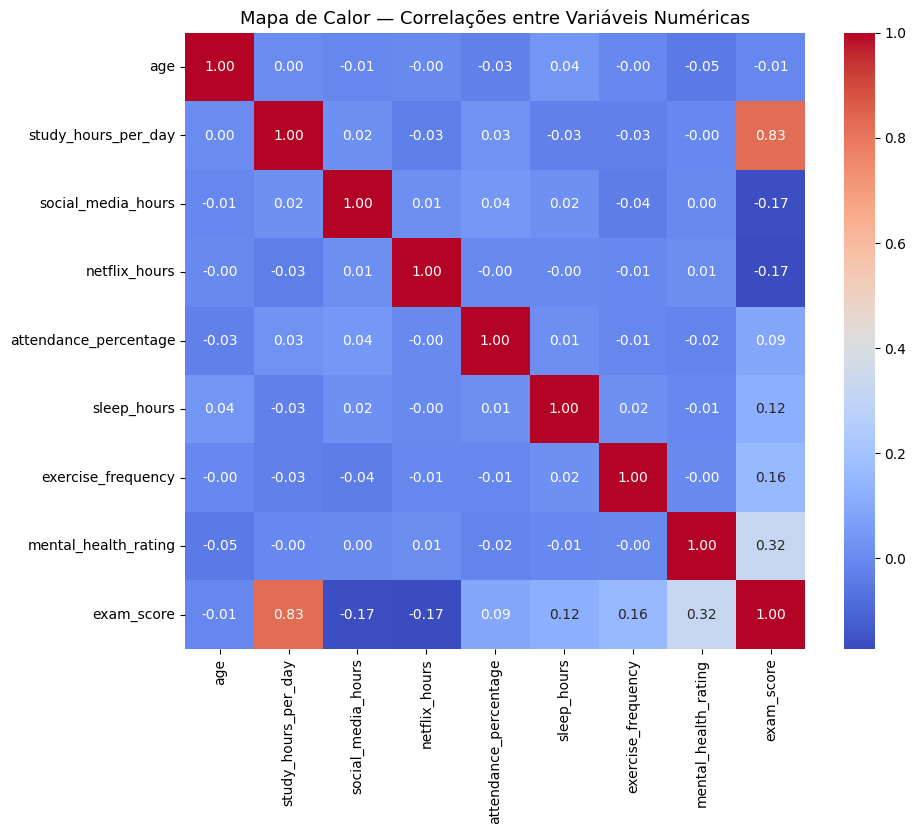

In [32]:
# Criar matriz de correlação
corr = df.corr(numeric_only=True)

# Exibir correlação da nota (exam_score) com as demais variáveis
print("Correlação de cada variável com exam_score:\n")
print(corr["exam_score"].sort_values(ascending=False))

# Visualização gráfica — mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor — Correlações entre Variáveis Numéricas", fontsize=13)
plt.show()


In [33]:
# Ranking de variáveis mais correlacionadas com exam_score
corr_exam = corr["exam_score"].drop("exam_score").sort_values(ascending=False)
corr_exam

study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64

In [34]:
# Horas de estudo
media_estudo = df.groupby("study_hours_category")["exam_score"].mean()

# Uso de redes sociais
media_redes = df.groupby("social_media_usage_category")["exam_score"].mean()

# Saúde mental
media_saude = df.groupby("mental_health_category")["exam_score"].mean()

print("Média de notas por faixa de estudo:")
print(media_estudo, "\n")

print("Média de notas por uso de redes sociais:")
print(media_redes, "\n")

print("Média de notas por saúde mental:")
print(media_saude)


Média de notas por faixa de estudo:
study_hours_category
Muito Baixo     46.973377
Baixo           65.960915
Moderado        82.051713
Alto            97.661905
Intenso        100.000000
Name: exam_score, dtype: float64 

Média de notas por uso de redes sociais:
social_media_usage_category
Muito Baixo    72.785352
Baixo          68.379417
Moderado       64.953763
Alto           60.566667
Excessivo            NaN
Name: exam_score, dtype: float64 

Média de notas por saúde mental:
mental_health_category
Baixa        63.431561
Moderada     67.866246
Boa          74.430102
Excelente    77.455376
Name: exam_score, dtype: float64


C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\295033029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_estudo = df.groupby("study_hours_category")["exam_score"].mean()
C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\295033029.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_redes = df.groupby("social_media_usage_category")["exam_score"].mean()
C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\295033029.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\2984094985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="study_hours_category", y="exam_score", data=df, palette="Blues")


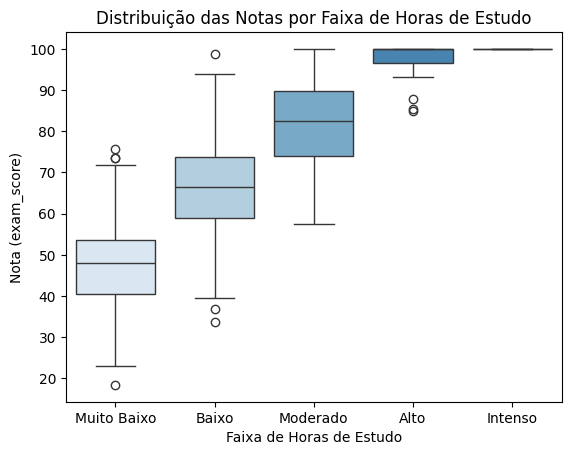

In [35]:
sns.boxplot(x="study_hours_category", y="exam_score", data=df, palette="Blues")
plt.title("Distribuição das Notas por Faixa de Horas de Estudo")
plt.xlabel("Faixa de Horas de Estudo")
plt.ylabel("Nota (exam_score)")
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\3368931788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="social_media_usage_category", y="exam_score", data=df, palette="Reds")


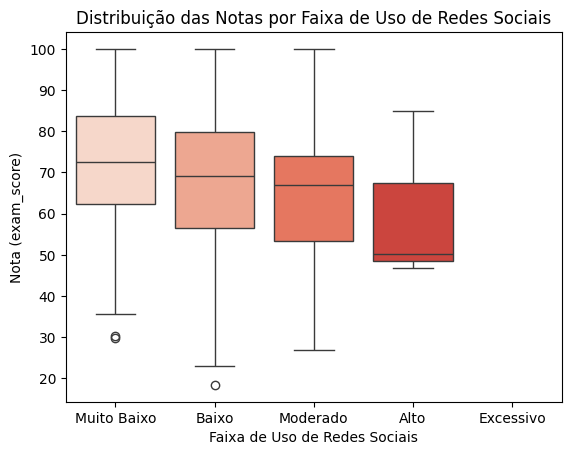

In [36]:
sns.boxplot(x="social_media_usage_category", y="exam_score", data=df, palette="Reds")
plt.title("Distribuição das Notas por Faixa de Uso de Redes Sociais")
plt.xlabel("Faixa de Uso de Redes Sociais")
plt.ylabel("Nota (exam_score)")
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\461507285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mental_health_category", y="exam_score", data=df, palette="Greens")


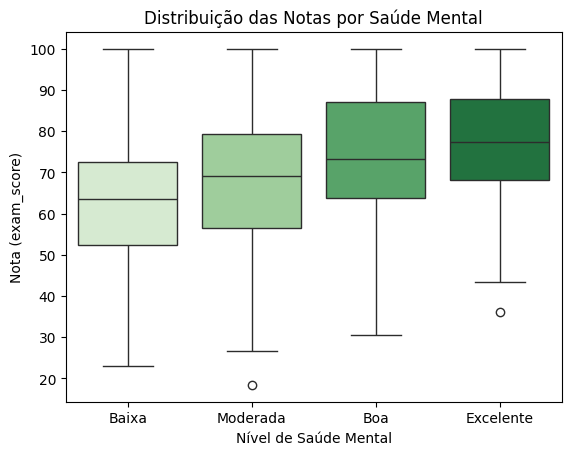

In [37]:
sns.boxplot(x="mental_health_category", y="exam_score", data=df, palette="Greens")
plt.title("Distribuição das Notas por Saúde Mental")
plt.xlabel("Nível de Saúde Mental")
plt.ylabel("Nota (exam_score)")
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\3062131058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


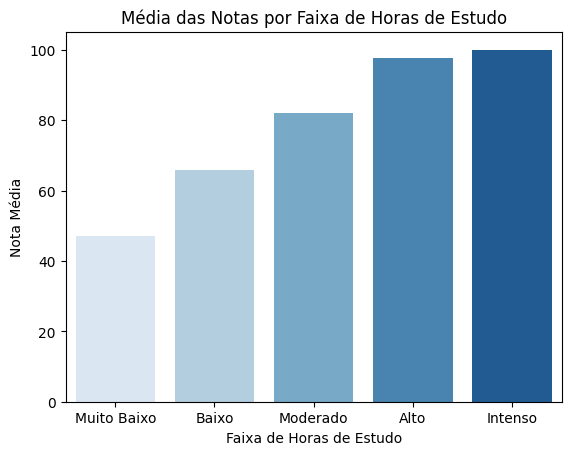

In [38]:
sns.barplot(
    x="study_hours_category",
    y="exam_score",
    data=df,
    estimator="mean",
    palette="Blues",
    errorbar=None
)
plt.title("Média das Notas por Faixa de Horas de Estudo")
plt.xlabel("Faixa de Horas de Estudo")
plt.ylabel("Nota Média")
plt.show()

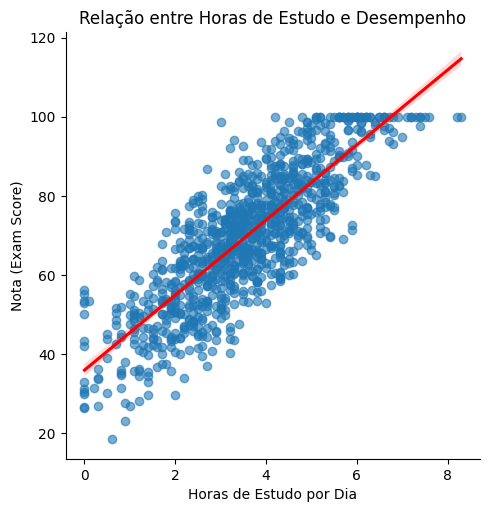

In [39]:
sns.lmplot(
    x="study_hours_per_day",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Horas de Estudo e Desempenho")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota (Exam Score)")
plt.show()


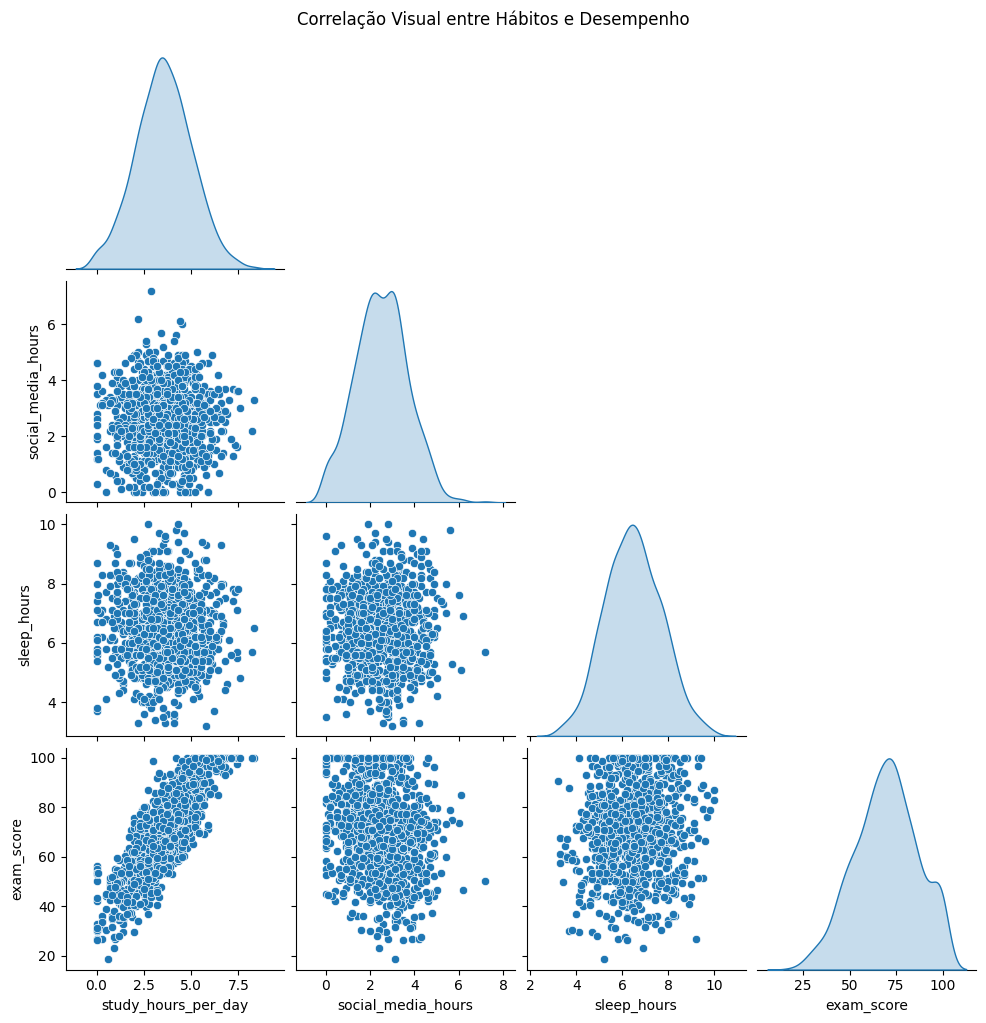

In [40]:
sns.pairplot(
    df[["study_hours_per_day", "social_media_hours", "sleep_hours", "exam_score"]],
    diag_kind="kde",
    corner=True
)
plt.suptitle("Correlação Visual entre Hábitos e Desempenho", y=1.02)
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\1496458778.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


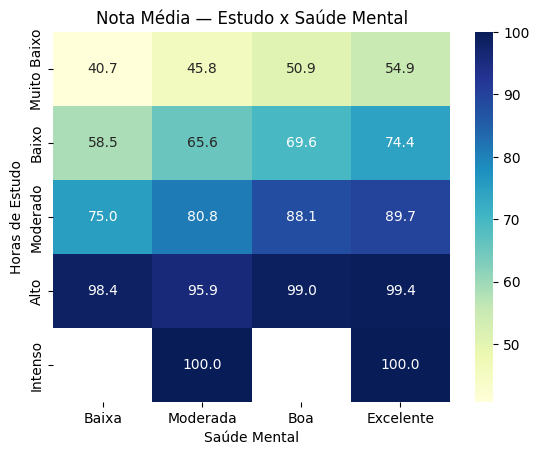

In [41]:
pivot_table = df.pivot_table(
    values="exam_score",
    index="study_hours_category",
    columns="mental_health_category",
    aggfunc="mean"
)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Nota Média — Estudo x Saúde Mental")
plt.xlabel("Saúde Mental")
plt.ylabel("Horas de Estudo")
plt.show()


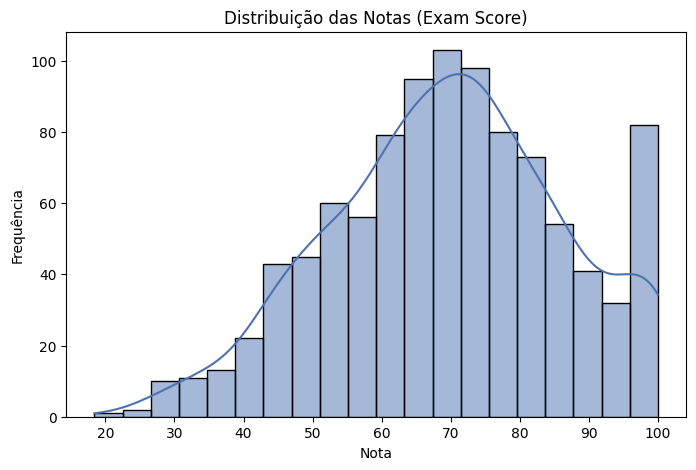

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["exam_score"], bins=20, kde=True, color="#4C72B0")
plt.title("Distribuição das Notas (Exam Score)")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()


| Tipo de gráfico  | Ideal para...                    | Melhor insight                     |
| ---------------- | -------------------------------- | ---------------------------------- |
| **Barplot**      | Comparar médias entre grupos     | “Quem tem melhor desempenho?”      |
| **Boxplot**      | Ver dispersão e outliers         | “Quanta variação há entre grupos?” |
| **Violin plot**  | Ver densidade + dispersão        | “Onde os alunos se concentram?”    |
| **Scatter plot** | Relação direta entre 2 variáveis | “Existe correlação?”               |
| **Pairplot**     | Relações múltiplas numéricas     | “Quais variáveis se relacionam?”   |
| **Heatmap (2D)** | Interações entre categorias      | “Como dois fatores se combinam?”   |
| **Histograma**   | Distribuição geral               | “Como está a curva de notas?”      |


In [44]:
from scipy.stats import f_oneway

# Comparar grupos de estudo
grupos_estudo = [grupo["exam_score"].values for _, grupo in df.groupby("study_hours_category")]

anova_result = f_oneway(*grupos_estudo)
print("Resultado ANOVA - Horas de Estudo x Nota:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.5f}")


Resultado ANOVA - Horas de Estudo x Nota:
F = 367.399, p = 0.00000


C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\912263179.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos_estudo = [grupo["exam_score"].values for _, grupo in df.groupby("study_hours_category")]


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_posthoc = pairwise_tukeyhsd(
    endog=df["exam_score"],
    groups=df["study_hours_category"],
    alpha=0.05
)

print(anova_posthoc)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2   meandiff p-adj   lower    upper   reject
-------------------------------------------------------------
    Alto       Baixo  -31.701    0.0 -36.4288 -26.9732   True
    Alto     Intenso   2.3381 0.9982 -18.9283  23.6045  False
    Alto    Moderado -15.6102    0.0 -20.4317 -10.7887   True
    Alto Muito Baixo -50.6885    0.0 -55.8036 -45.5735   True
   Baixo     Intenso  34.0391 0.0001  13.2184  54.8597   True
   Baixo    Moderado  16.0908    0.0  13.9731  18.2085   True
   Baixo Muito Baixo -18.9875    0.0 -21.7081  -16.267   True
 Intenso    Moderado -17.9483 0.1293 -38.7904   2.8938  False
 Intenso Muito Baixo -53.0266    0.0 -73.9386 -32.1147   True
Moderado Muito Baixo -35.0783    0.0 -37.9587  -32.198   True
-------------------------------------------------------------


meandiff = -31.7:
As notas dos alunos de categoria Alto são, em média, 31,7 pontos maiores que as de Baixo.

p-adj = 0.000:
A probabilidade de essa diferença ser aleatória é quase zero → diferença real e confiável.

reject = True:
Confirmado: há diferença significativa entre esses dois grupos.

In [48]:
import statsmodels.api as sm

X = df[["study_hours_per_day", "social_media_hours", "sleep_hours", "mental_health_rating"]]
y = df["exam_score"]

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1337.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:24:22   Log-Likelihood:                -3318.8
No. Observations:                1000   AIC:                             6648.
Df Residuals:                     995   BIC:                             6672.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   18.3692 

In [49]:
df.groupby(["mental_health_category", "social_media_usage_category"])["exam_score"].mean().unstack()

C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\1720222422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["mental_health_category", "social_media_usage_category"])["exam_score"].mean().unstack()


social_media_usage_category,Muito Baixo,Baixo,Moderado,Alto,Excessivo
mental_health_category,,,,,
Baixa,67.474766,61.398214,59.930769,NaN,NaN
Moderada,73.098077,65.875000,63.132258,48.4,NaN
Boa,74.993750,75.186735,67.805556,NaN,NaN
Excelente,78.395313,77.666019,72.494444,84.9,NaN


In [50]:
df["lifestyle_balance"] = (
    df["sleep_hours"] + df["exercise_frequency"] - df["social_media_hours"]
)
print(df[["lifestyle_balance", "exam_score"]].corr())


                   lifestyle_balance  exam_score
lifestyle_balance           1.000000    0.249252
exam_score                  0.249252    1.000000


Alunos com melhor equilíbrio de vida (mais sono + exercícios, menos redes sociais) tendem a ter notas mais altas, mas essa relação não é muito forte.

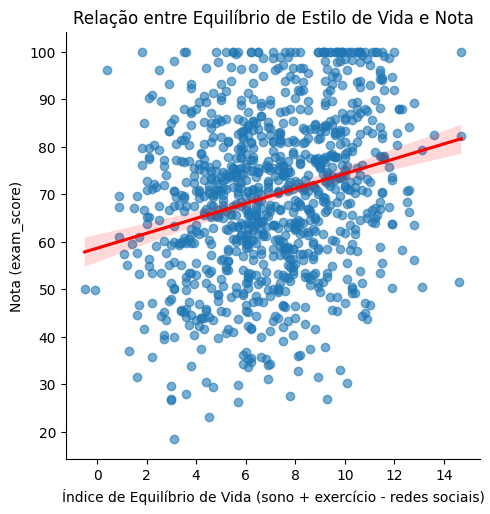

In [51]:
sns.lmplot(
    x="lifestyle_balance",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Equilíbrio de Estilo de Vida e Nota")
plt.xlabel("Índice de Equilíbrio de Vida (sono + exercício - redes sociais)")
plt.ylabel("Nota (exam_score)")
plt.show()


In [52]:
# Correlação entre lifestyle_balance e saúde mental
correlacao_saude = df[["lifestyle_balance", "mental_health_rating"]].corr()
print(correlacao_saude)


                      lifestyle_balance  mental_health_rating
lifestyle_balance               1.00000              -0.00381
mental_health_rating           -0.00381               1.00000


Alunos com rotinas mais equilibradas não necessariamente têm melhor (ou pior) saúde mental, segundo esses dados.

In [53]:
# Criar faixas de equilíbrio
df["lifestyle_category"] = pd.cut(
    df["lifestyle_balance"],
    bins=[-10, 0, 5, 10, 15, 25],
    labels=["Muito Baixo", "Baixo", "Moderado", "Bom", "Excelente"],
    include_lowest=True
)

# Média da saúde mental por categoria de estilo de vida
df.groupby("lifestyle_category")["mental_health_rating"].mean()


C:\Users\joaos\AppData\Local\Temp\ipykernel_8124\3580675777.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("lifestyle_category")["mental_health_rating"].mean()


lifestyle_category
Muito Baixo    6.500000
Baixo          5.423868
Moderado       5.433225
Bom            5.468085
Excelente           NaN
Name: mental_health_rating, dtype: float64

A diferença entre as categorias é pequena — cerca de 1 ponto no máximo.

Isso reforça que não há tendência consistente:
mesmo alunos com estilo de vida “muito baixo” relatam saúde mental igual ou superior aos de “bom”.

# Síntese de Insights e Recomendações

## 🧩 1. Resumo Estatístico dos Resultados

| Tema Analisado | Resultado | Interpretação |
|----------------|------------|----------------|
| **Horas de Estudo × Nota** | Correlação positiva forte (ANOVA F=367.4, p<0.001) | O tempo de estudo é o fator **mais determinante** para o desempenho. |
| **Redes Sociais × Nota** | Correlação negativa moderada | Uso excessivo reduz o desempenho, com impacto notável acima de 6h/dia. |
| **Saúde Mental × Nota** | Correlação positiva leve | Alunos emocionalmente equilibrados tendem a apresentar notas levemente superiores. |
| **Sono e Exercícios × Nota** | Correlação fraca positiva | Influenciam indiretamente, aumentando foco e disposição. |
| **Equilíbrio de Vida × Saúde Mental** | Correlação ≈ 0 | O equilíbrio físico/social não explica sozinho a variação da saúde mental. |

---

## 📊 2. Principais Descobertas Visuais

1. **Mapa de Calor de Correlação:**  
   Mostra forte relação entre `study_hours_per_day` e `exam_score`, e relação inversa com `social_media_hours`.

2. **Boxplots Comparativos:**  
   Notas aumentam até a faixa *“Alto”* de estudo; acima de 8h/dia, o ganho é insignificante.

3. **Gráfico de Barras (ANOVA-Tukey):**  
   Diferenças significativas entre todas as faixas de estudo, exceto entre “Alto” e “Intenso”.

4. **Dispersão (Lifestyle × Nota):**  
   Tendência levemente positiva — alunos com melhor equilíbrio de vida tendem a notas um pouco maiores.

---

## 💬 3. Insights Práticos

### 📘 1. O Estudo é o Principal Fator de Sucesso
> O desempenho cresce fortemente até cerca de 8 horas diárias de estudo.  
> Após esse ponto, os ganhos se estabilizam, indicando retorno decrescente.

**Recomendação:**  
Planejar rotinas de estudo de **6–8h diárias**, com pausas e revisões periódicas, priorizando constância.

---

### 📱 2. Uso de Redes Sociais Afeta o Desempenho
> A partir de 6h diárias de uso, observa-se queda significativa nas notas.

**Recomendação:**  
Implementar programas de conscientização digital e incentivo à moderação no uso de redes sociais durante períodos de foco.

---

### 😌 3. Saúde Mental Impacta, mas é Multidimensional
> Alunos emocionalmente equilibrados têm melhor desempenho, mas a relação é moderada e dependente de outros fatores.

**Recomendação:**  
Integrar ações de **saúde emocional** com boas práticas de estudo e organização de tempo.

---

### 💤 4. Sono e Exercícios Complementam o Desempenho
> Contribuem para foco e energia, mas de forma indireta.

**Recomendação:**  
Estimular **hábitos regulares de sono (≥7h/noite)** e **exercícios leves diários**.

---

### ⚖️ 5. O Equilíbrio de Vida Atua Indiretamente
> O índice `lifestyle_balance` tem pouca correlação direta, mas reflete consistência de hábitos.

**Recomendação:**  
Focar em **rotinas sustentáveis**, evitando extremos de esforço e lazer digital.

---

## 📘 4. Conclusão Geral

> O desempenho acadêmico é um reflexo do equilíbrio entre **dedicação, descanso e moderação digital**.  
> O tempo de estudo é o fator central, mas hábitos complementares de sono, exercício e foco mental **maximizam o resultado**.

**Resumo Final:**  
> “Estudar com constância, dormir bem e reduzir distrações digitais formam o triângulo de ouro do bom desempenho.”